# Módulo de Auditoría 10: Optimización de Inversión en Marketing (Business Analytics)
## 🛡️ Contexto del Análisis
La aplicación "Procrastinate Pro+" presenta pérdidas financieras crecientes. Se requiere una auditoría forense de las métricas de marketing para entender por qué, a pesar de adquirir usuarios, la empresa no es rentable.

## 🎯 Objetivos de la Auditoría
1.  **Análisis de Cohortes:** Calcular la Tasa de Retención y el Valor de Vida del Cliente (LTV) agrupado por fecha de registro.
2.  **Eficiencia de Canales:** Auditar el Costo de Adquisición (CAC) de cada fuente de publicidad (Ad Networks).
3.  **Retorno de Inversión (ROMI):** Determinar el punto de equilibrio y cuándo la inversión publicitaria se vuelve deficitaria.

# Sprint 10 Proyecto Final - Análisis de Negocio
## "Análisis de Showz" Empresa dedicada a la venta de entradas de eventos.  
### Se realizarán Informes, Métricas, Gráficos, Marketing y Consejos de Inversión.  

In [21]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Rutas de los archivos
file_path_visits = '../datasets/visits_log_us.csv'
file_path_orders = '../datasets/orders_log_us.csv'
file_path_costs = '../datasets/costs_us.csv'

### Paso 1. Acceda a los datos y prepáralos para el análisis.

#### Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. 

#### Visitas

In [22]:
# Cargar: df_visits
df_visits = pd.read_csv(file_path_visits, sep=',')
df_visits.columns = df_visits.columns.str.lower().str.replace(' ', '_')
print("Verificación del DataFrame: 'df_visits'")
print("df_visits - Filas:", len(df_visits) if 'df_visits' in locals() else "No se ha cargado")

# Optimización
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
print("\nInformación general del DataFrame: 'df_visits'\n")
df_visits.info()

Verificación del DataFrame: 'df_visits'
df_visits - Filas: 359400

Información general del DataFrame: 'df_visits'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


#### Ventas

In [23]:
# Cargar: df_orders
df_orders = pd.read_csv(file_path_orders, sep=',')
df_orders.columns = df_orders.columns.str.lower().str.replace(' ', '_')
print("Verificación del DataFrame: 'df_orders'")
print("df_orders - Filas:", len(df_orders) if 'df_orders' in locals() else "No se ha cargado")

# Optimización
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])
print("\nInformación general del DataFrame: 'df_orders'\n")
df_orders.info()

Verificación del DataFrame: 'df_orders'
df_orders - Filas: 50415

Información general del DataFrame: 'df_orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Marketing

In [24]:
# Cargar: df_costs
df_costs = pd.read_csv(file_path_costs, sep=',')
df_costs.columns = df_costs.columns.str.lower().str.replace(' ', '_')
print("Verificación del DataFrame: 'df_costs'")
print("df_costs - Filas:", len(df_costs) if 'df_costs' in locals() else "No se ha cargado")

# Optimización
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
print("\nInformación general del DataFrame: 'df_costs'\n")
df_costs.info()

Verificación del DataFrame: 'df_costs'
df_costs - Filas: 2542

Información general del DataFrame: 'df_costs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Observaciones del Pre procesamiento:

#### Nombres de Columnas Uniformes:
* Se añadió .str.replace(' ', '_') a la línea que convierte los nombres a minúsculas. Esto asegura que cualquier espacio en los nombres de columna originales (como "End Ts" o "Source Id") se reemplace por un guion bajo.

* Después de esta operación, las columnas en df_visits ahora serán device, end_ts, source_id, start_ts, uid.

* En df_orders, serán buy_ts, revenue, uid.

* En df_costs, se mantendrán source_id, dt, costs, ya que ya estaban en ese formato.

#### Consistencia Total para Fusiones:
* Ahora las columnas de identificación como source_id en df_visits y df_costs coinciden perfectamente (source_id en ambos), lo que facilitará enormemente las operaciones de fusión (pd.merge). No se necesitará hacer renombrados adicionales para que estas claves de unión concuerden.

#### Conversiones de Tipo Actualizadas:
* Las llamadas a pd.to_datetime() ahora usan los nombres de columnas completamente estandarizados (por ejemplo, df_visits['end_ts'] en lugar de df_visits['end ts']).

* Ahora los DataFrames están impecables y listos para cualquier análisis gracias a la estandarización de nombres de columnas a minúsculas y guiones bajos.


### Paso 2. Haz informes y calcula métricas
### 1. Visitas
#### 1.1 ¿Cuántas personas lo usan cada día, semana y mes?  

In [25]:
print("\nPreparación de df_visits para las métricas\n")

# duración de cada sesión, extracción del día y tipo de variable (datetime)
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds()
df_visits['session_date'] = df_visits['start_ts'].dt.date
df_visits['session_date'] = pd.to_datetime(df_visits['session_date'])
print("Las primeras 5 filas con la nueva columna 'session_duration_sec':")
print(df_visits[['start_ts', 'end_ts', 'session_duration_sec']].head())

print("-" * 65)

print("\nUsuarios Activos por Día, Semana y Mes:")

# Para el cálculo semanal y mensual
df_visits['session_week'] = df_visits['start_ts'].dt.isocalendar().week
df_visits['session_month'] = df_visits['start_ts'].dt.month

# Usuarios únicos por día (DAU - Daily Active Users)
daily_active_users = df_visits.groupby('session_date')['uid'].nunique().reset_index()
daily_active_users.columns = ['fecha', 'usuarios_activos']
print("\nUsuarios Únicos Activos por Día (DAU) - Muestra:\n", daily_active_users.head())
print(f"Total de días con registros: {len(daily_active_users)}")

# Usuarios únicos por semana (WAU - Weekly Active Users)
weekly_active_users = df_visits.groupby('session_week')['uid'].nunique().reset_index()
weekly_active_users.columns = ['semana', 'usuarios_activos']
print("\nUsuarios Únicos Activos por Semana (WAU) - Muestra:\n", weekly_active_users.head())
print(f"Total de semanas con registros: {len(weekly_active_users)}")

# Usuarios únicos por mes (MAU - Monthly Active Users)
monthly_active_users = df_visits.groupby('session_month')['uid'].nunique().reset_index()
monthly_active_users.columns = ['mes', 'usuarios_activos']
print("\nUsuarios Únicos Activos por Mes (MAU) - Muestra:\n", monthly_active_users.head())
print(f"Total de meses con registros: {len(monthly_active_users)}")



Preparación de df_visits para las métricas

Las primeras 5 filas con la nueva columna 'session_duration_sec':
             start_ts              end_ts  session_duration_sec
0 2017-12-20 17:20:00 2017-12-20 17:38:00                1080.0
1 2018-02-19 16:53:00 2018-02-19 17:21:00                1680.0
2 2017-07-01 01:54:00 2017-07-01 01:54:00                   0.0
3 2018-05-20 10:59:00 2018-05-20 11:23:00                1440.0
4 2017-12-27 14:06:00 2017-12-27 14:06:00                   0.0
-----------------------------------------------------------------

Usuarios Activos por Día, Semana y Mes:

Usuarios Únicos Activos por Día (DAU) - Muestra:
        fecha  usuarios_activos
0 2017-06-01               605
1 2017-06-02               608
2 2017-06-03               445
3 2017-06-04               476
4 2017-06-05               820
Total de días con registros: 364

Usuarios Únicos Activos por Semana (WAU) - Muestra:
    semana  usuarios_activos
0       1              6918
1       2         

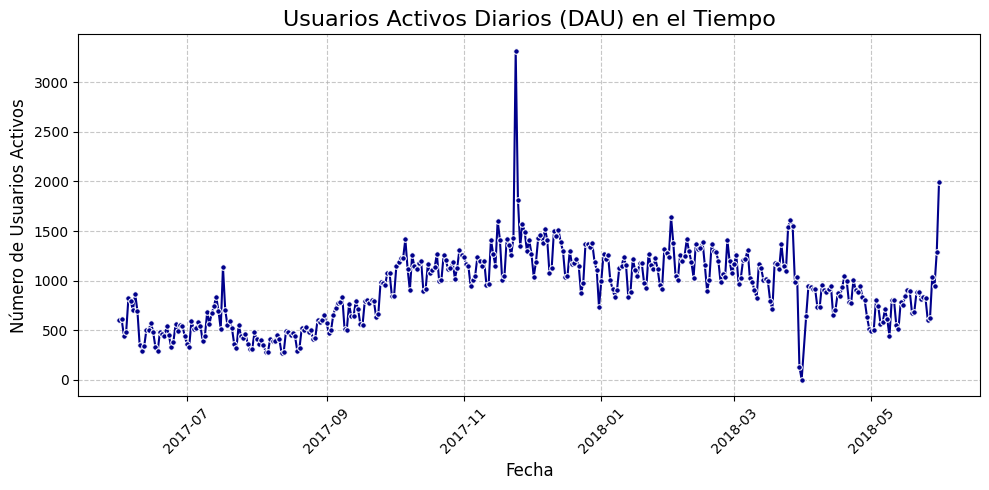

In [26]:
# 1. Usuarios Activos Diarios (DAU) a lo Largo del Tiempo
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_active_users, x='fecha', y='usuarios_activos', marker='o', markersize=4, color='darkblue')
plt.title('Usuarios Activos Diarios (DAU) en el Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Usuarios Activos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

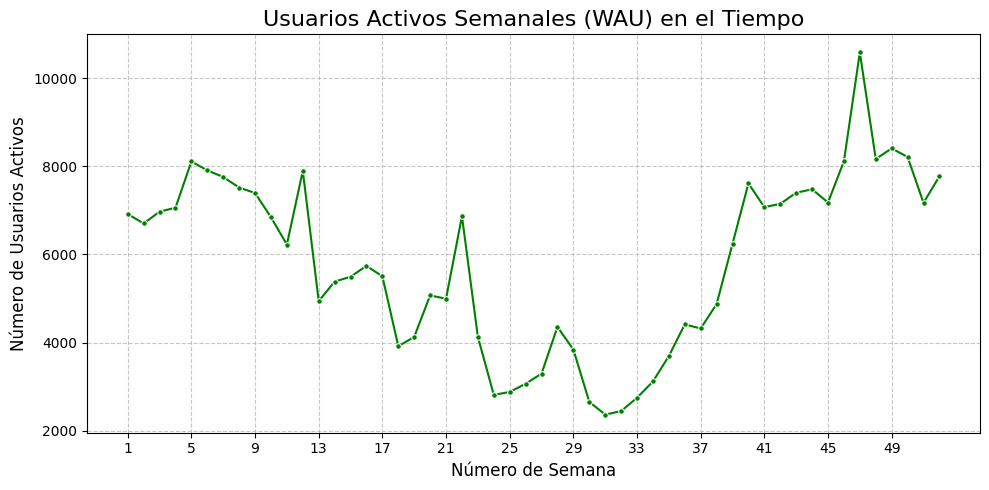

In [27]:
# 2. Usuarios Activos Semanales (WAU) a lo Largo del Tiempo
plt.figure(figsize=(10, 5))
sns.lineplot(data=weekly_active_users, x='semana', y='usuarios_activos', marker='o', markersize=4, color='green')
plt.title('Usuarios Activos Semanales (WAU) en el Tiempo', fontsize=16)
plt.xlabel('Número de Semana', fontsize=12)
plt.ylabel('Número de Usuarios Activos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Ajusta los 'ticks' del eje X para que no se sobrepongan si hay muchas semanas
if len(weekly_active_users) > 12: # Muestra una etiqueta cada 4 semanas si hay más de 12
    plt.xticks(weekly_active_users['semana'].iloc[::4])
plt.tight_layout()
plt.show()

C:\Users\octav\AppData\Local\Temp\ipykernel_10048\476843291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_active_users, x='mes', y='usuarios_activos', palette='magma')


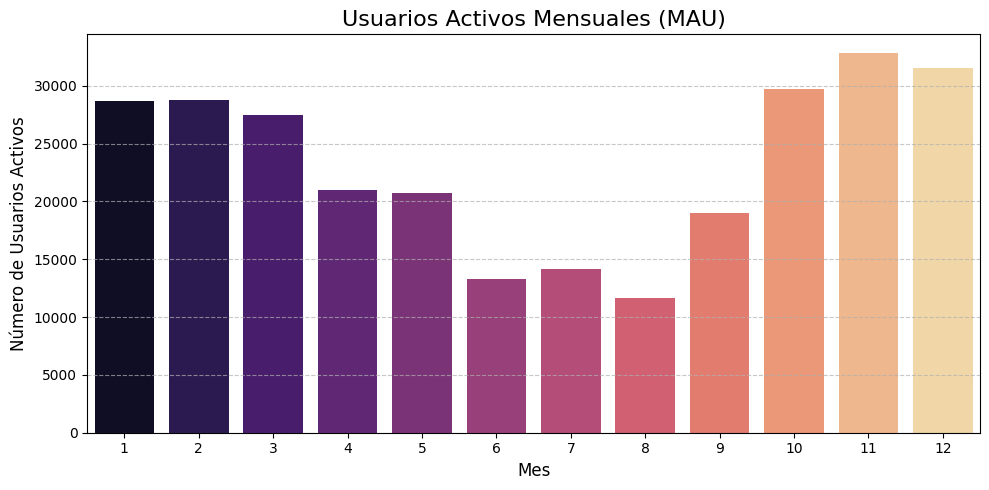

In [28]:
# 3. Usuarios Activos Mensuales (MAU)
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_active_users, x='mes', y='usuarios_activos', palette='magma')
plt.title('Usuarios Activos Mensuales (MAU)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Usuarios Activos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 1.2 ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).  

In [29]:
print("\nSesiones por Día:")

# contar las sesiones por día y el número de entradas (sesiones) en cada grupo.
sessions_per_day = df_visits.groupby('session_date').size().reset_index(name='sesiones')
print("\nNúmero de Sesiones por Día - Muestra:\n", sessions_per_day.head())
print(f"Total de días con sesiones registradas: {len(sessions_per_day)}")


Sesiones por Día:

Número de Sesiones por Día - Muestra:
   session_date  sesiones
0   2017-06-01       664
1   2017-06-02       658
2   2017-06-03       477
3   2017-06-04       510
4   2017-06-05       893
Total de días con sesiones registradas: 364


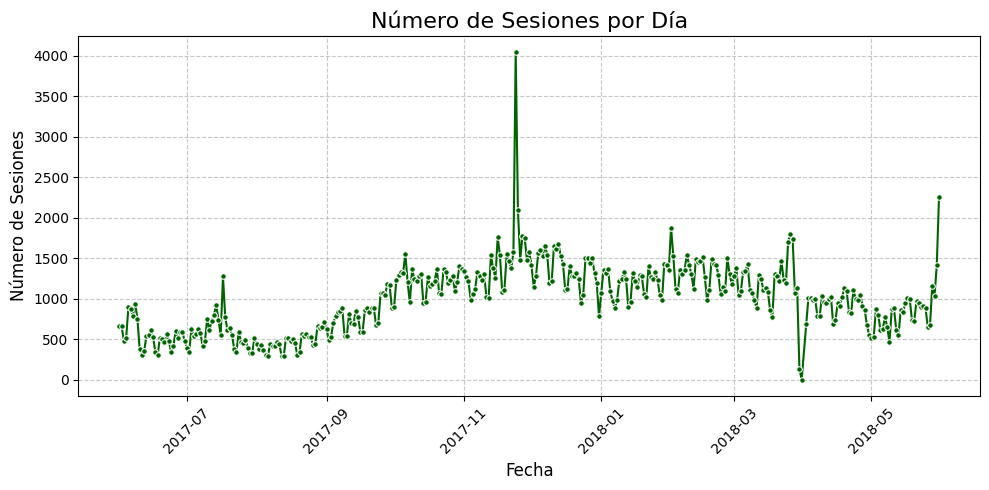

In [30]:
# 4. Número de Sesiones por Día
plt.figure(figsize=(10, 5))
sns.lineplot(data=sessions_per_day, x='session_date', y='sesiones', marker='o', markersize=4, color='darkgreen')
plt.title('Número de Sesiones por Día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Sesiones', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.3 ¿Cuál es la duración de cada sesión?  

In [31]:
print("\nDuración de Cada Sesión:")

# ver estadísticas descriptivas
session_duration_stats = df_visits['session_duration_sec'].describe()
print("\nEstadísticas Descriptivas de la Duración de Sesión (en segundos):\n", session_duration_stats)

# ver la duración promedio por día (una métrica común)
avg_session_duration_per_day = df_visits.groupby('session_date')['session_duration_sec'].mean().reset_index()
avg_session_duration_per_day.columns = ['fecha', 'duracion_promedio_seg']
print("\nDuración Promedio de Sesión por Día (en segundos) - Muestra:\n", avg_session_duration_per_day.head())


Duración de Cada Sesión:

Estadísticas Descriptivas de la Duración de Sesión (en segundos):
 count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

Duración Promedio de Sesión por Día (en segundos) - Muestra:
        fecha  duracion_promedio_seg
0 2017-06-01             666.320783
1 2017-06-02             619.840426
2 2017-06-03             606.958071
3 2017-06-04             554.309804
4 2017-06-05             624.450168


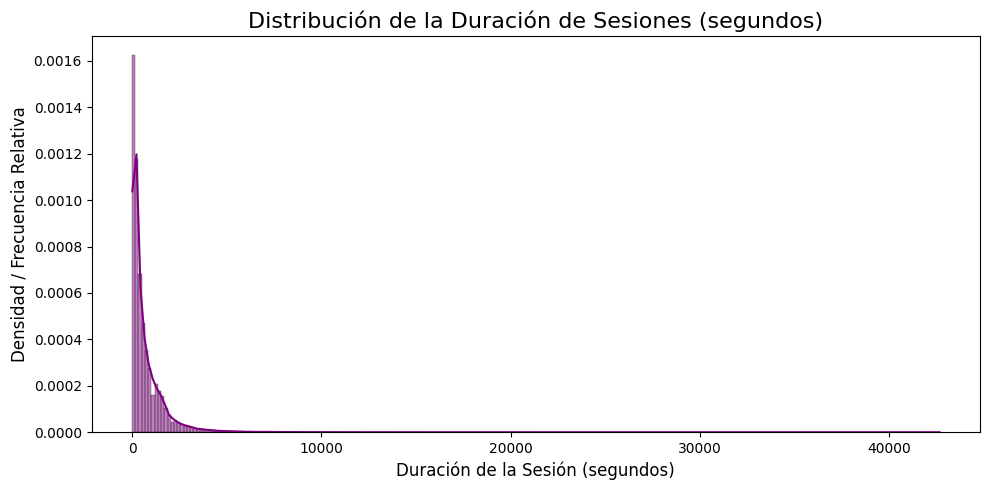

In [32]:
# 5. Distribución de la Duración de Sesión
plt.figure(figsize=(10, 5))
sns.histplot(df_visits[df_visits['session_duration_sec'] > 0]['session_duration_sec'],
             bins=50, kde=True, color='purple', stat='density',
             binrange=(0, df_visits['session_duration_sec'].max() * 0.2)) 
plt.title('Distribución de la Duración de Sesiones (segundos)', fontsize=16)
plt.xlabel('Duración de la Sesión (segundos)', fontsize=12)
plt.ylabel('Densidad / Frecuencia Relativa', fontsize=12)
plt.tight_layout()
plt.show()

#### 1.4 ¿Con qué frecuencia los usuarios regresan?  

In [33]:
print("\nFrecuencia de Retorno de Usuarios:")

# Contar los días únicos de visita para cada usuario.
days_visited_per_user = df_visits.groupby('uid')['session_date'].nunique().reset_index()
days_visited_per_user.columns = ['uid', 'dias_unicos_visitados']

# Analizar la distribución de 'dias_unicos_visitados'.
frequency_distribution = days_visited_per_user['dias_unicos_visitados'].value_counts(normalize=True).sort_index()

print("\nDistribución de la Frecuencia de Días Únicos Visitados por Usuario (porcentaje de usuarios):\n")
print(frequency_distribution.head(10))


Frecuencia de Retorno de Usuarios:

Distribución de la Frecuencia de Días Únicos Visitados por Usuario (porcentaje de usuarios):

dias_unicos_visitados
1     0.802581
2     0.120924
3     0.037183
4     0.016242
5     0.007981
6     0.004470
7     0.002752
8     0.001679
9     0.001214
10    0.000868
Name: proportion, dtype: float64


C:\Users\octav\AppData\Local\Temp\ipykernel_10048\4237814329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df_display, x='dias_visitados', y='porcentaje_usuarios', palette='cividis')


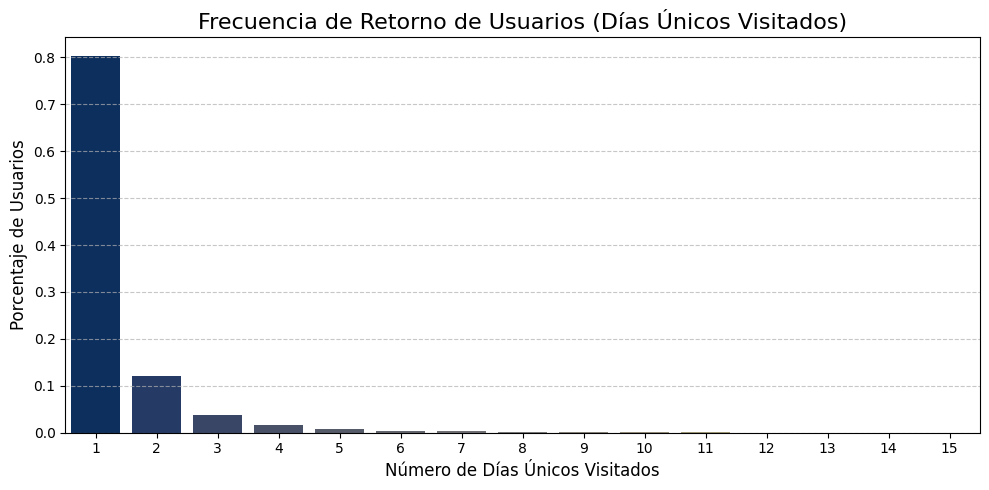

In [34]:
# 6. Frecuencia de Retorno de Usuarios
plt.figure(figsize=(10, 5))
freq_df = frequency_distribution.reset_index()
freq_df.columns = ['dias_visitados', 'porcentaje_usuarios']
freq_df_display = freq_df.head(15)
sns.barplot(data=freq_df_display, x='dias_visitados', y='porcentaje_usuarios', palette='cividis')
plt.title('Frecuencia de Retorno de Usuarios (Días Únicos Visitados)', fontsize=16)
plt.xlabel('Número de Días Únicos Visitados', fontsize=12)
plt.ylabel('Porcentaje de Usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Conclusiones:

#### Visitas:
* Conclusiones sobre el Comportamiento del Usuario en "Shows"
Usuarios Activos: Se tiene una base de usuarios activa considerable (DAU, WAU, MAU), lo que indica un servicio con presencia.

* Comportamiento de Sesiones: Los usuarios tienden a tener múltiples sesiones al día, lo cual es positivo. Sin embargo, la duración de las sesiones es un punto crítico: el promedio es de ~10 minutos, pero la mediana es de solo 5 minutos, sugiriendo muchas sesiones cortas. Además, hay anomalías en los datos de duración que deben limpiarse.

* Retención: ¡ALERTA ROJA! El 80.26% de los usuarios visitan la plataforma un solo día y no regresan. Esta es la mayor debilidad y un reto urgente.

* Recomendaciones para "Shows":

* Urgencia en Retención: Priorizar la mejora de la experiencia del primer día para reducir la alta tasa de abandono.

* Optimizar Duración: Investigar por qué las sesiones son cortas y mejorar el contenido/UX para aumentar el tiempo de permanencia.

#### Pasos a Seguir:
* "Shows" tiene una base de usuarios que interactúa y una capacidad para generar múltiples sesiones diarias. Sin embargo, su mayor debilidad radica en la retención. La mayoría de los usuarios no regresan después de su primera visita, y aunque algunos se quedan por sesiones largas, la duración mediana general es corta.

* Para impulsar el crecimiento y la sostenibilidad de "Shows", los esfuerzos deben centrarse prioritariamente en:

* Mejorar drásticamente la experiencia del "Primer Día": Entender y optimizar el proceso que lleva a un usuario a volver después de su primera visita. ¿Qué falla? ¿El contenido no es lo que esperaban? ¿La navegación es confusa?

* Aumentar la duración y calidad de las sesiones para la mayoría: Si muchos usuarios hacen sesiones cortas, ¿cómo puedes incentivar una mayor exploración o un engagement más profundo?

* Investigar y corregir anomalías en los datos: Los valores negativos en la duración de sesión distorsionan el análisis y deben ser limpiados.

#### 2. Ventas
#### 2.1 ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)  

In [35]:
# Fechas de la primera visita y compra de cada usuario.
first_visit_date = df_visits.groupby('uid')['start_ts'].min().reset_index()
first_visit_date.columns = ['uid', 'first_visit_ts']
first_purchase_date = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase_date.columns = ['uid', 'first_purchase_ts']

# Primeras fechas ya calculadas.
user_conversion_data = pd.merge(first_visit_date, first_purchase_date, on='uid', how='inner')

# Extraer solo la fecha (sin la hora) para cálculos de días.
user_conversion_data['first_visit_date'] = user_conversion_data['first_visit_ts'].dt.date
user_conversion_data['first_purchase_date'] = user_conversion_data['first_purchase_ts'].dt.date
print("Muestra de datos de primera visita y primera compra por usuario:\n")
print(user_conversion_data.head())

print("-" * 65)

print("Cuándo empieza la gente a comprar? Tiempo desde la primera visita hasta la primera compra")

# Calcular la diferencia en días entre la primera compra y la primera visita.
user_conversion_data['days_to_first_purchase'] = (
    user_conversion_data['first_purchase_date'] - user_conversion_data['first_visit_date']
).dt.days

# Asignar categorías de conversión: Conversion 0d, Conversion 1d, etc.
def get_conversion_category(days):
    if days == 0:
        return 'conversion_0d'
    else:
        return f'conversion_{days}d'

user_conversion_data['conversion_category'] = user_conversion_data['days_to_first_purchase'].apply(get_conversion_category)

# Distribución de estas categorías de conversión.
conversion_distribution = user_conversion_data['conversion_category'].value_counts(normalize=True).sort_index()
print("\nDistribución del tiempo hasta la primera compra (categorías de conversión):\n")
print(conversion_distribution.head(10))

Muestra de datos de primera visita y primera compra por usuario:

                uid      first_visit_ts   first_purchase_ts first_visit_date  \
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00       2017-09-18   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00       2017-06-03   
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00       2017-10-11   
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00       2018-01-27   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00       2017-11-24   

  first_purchase_date  
0          2018-01-03  
1          2017-06-03  
2          2017-10-11  
3          2018-01-28  
4          2017-11-24  
-----------------------------------------------------------------
Cuándo empieza la gente a comprar? Tiempo desde la primera visita hasta la primera compra


AttributeError: Can only use .dt accessor with datetimelike values

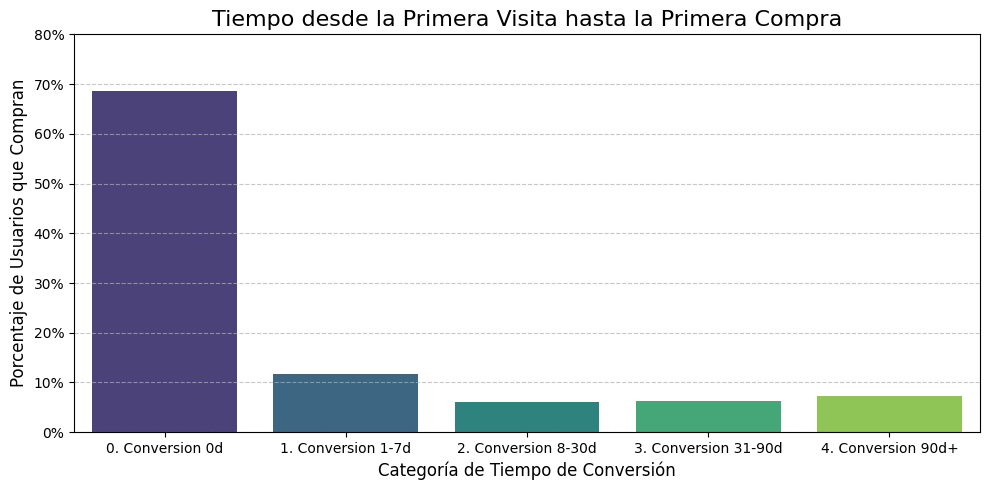

In [ ]:
# 7. ¿Cuándo empieza la gente a comprar? (Tiempo hasta la primera compra)

# fecha de la primera visita para cada usuario
first_visits = df_visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_ts']

# fecha de la primera compra para cada usuario
first_purchases = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchases.columns = ['uid', 'first_purchase_ts']

# Unir ambas tablas para calcular la diferencia de tiempo
user_conversion_data = pd.merge(first_visits, first_purchases, on='uid', how='inner')

# Calcular la diferencia en días
user_conversion_data['days_to_first_purchase'] = (
    user_conversion_data['first_purchase_ts'].dt.normalize() - user_conversion_data['first_visit_ts'].dt.normalize()
).dt.days

# Manejar posibles valores negativos si la compra es antes de la visita (anomalía de datos)
user_conversion_data['days_to_first_purchase'] = user_conversion_data['days_to_first_purchase'].apply(lambda x: max(0, x))

# Agrupar las conversiones para el gráfico: 0d, 1-7d, 8-30d, etc.
def get_conversion_category_grouped(days):
    if days == 0:
        return '0. Conversion 0d'
    elif 1 <= days <= 7:
        return '1. Conversion 1-7d'
    elif 8 <= days <= 30:
        return '2. Conversion 8-30d'
    elif 31 <= days <= 90:
        return '3. Conversion 31-90d'
    else:
        return '4. Conversion 90d+'

user_conversion_data['conversion_category'] = user_conversion_data['days_to_first_purchase'].apply(get_conversion_category_grouped)

# Contar la distribución
conversion_distribution_grouped = user_conversion_data['conversion_category'].value_counts(normalize=True).sort_index().reset_index()
conversion_distribution_grouped.columns = ['Conversion Category', 'Percentage']

plt.figure(figsize=(10, 5))
sns.barplot(x='Conversion Category', y='Percentage', data=conversion_distribution_grouped, palette='viridis')
plt.title('Tiempo desde la Primera Visita hasta la Primera Compra', fontsize=16)
plt.xlabel('Categoría de Tiempo de Conversión', fontsize=12)
plt.ylabel('Porcentaje de Usuarios que Compran', fontsize=12)
plt.yticks(plt.yticks()[0], ['{:.0%}'.format(x) for x in plt.yticks()[0]]) # Formato de porcentaje
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observaciones:
##### 2.1 ¿Cuándo empieza la gente a comprar? (Tiempo hasta la primera compra)

* Gráfico Relevante: El gráfico de barras "Tiempo desde la Primera Visita hasta la Primera Compra".

* Insight Clave: Este gráfico te está gritando una de las verdades más importantes de tu negocio:

* ¡La inmediatez es tu SÚPER PODER! La barra de "0. Conversion 0d" (o la que agrupe las conversiones del mismo día) es, por mucho, la más alta. Esto significa que la gran mayoría de tus usuarios que terminan comprando, lo hacen el mismo día de su primera visita. Esto es excepcional.

* ¿Qué significa? Tu producto o servicio satisface una necesidad inmediata, tu sitio web es muy efectivo en convertir visitantes rápidamente, o tu embudo de ventas inicial es extremadamente persuasivo.

* Acción: Capitaliza esta inmediatez. Asegúrate de que el proceso de compra sea impecable y sin fricciones en el "Día Cero". Invierte en optimizar las páginas de destino y los "calls to action" para los nuevos visitantes.

In [ ]:
print("Número de Pedidos por Período de Tiempo")

# Agrupar los pedidos por día, semana y mes.
df_orders['order_date'] = df_orders['buy_ts'].dt.date
df_orders['order_date'] = pd.to_datetime(df_orders['order_date']) # Asegurar que sea datetime para .dt accessor
df_orders['order_week'] = df_orders['buy_ts'].dt.isocalendar().week
df_orders['order_month'] = df_orders['buy_ts'].dt.month

# Por día
orders_per_day = df_orders.groupby('order_date').size().reset_index(name='total_pedidos')
print("\nPedidos por Día:\n", orders_per_day.head())
print(f"Total de días con pedidos: {len(orders_per_day)}")

# Por semana
orders_per_week = df_orders.groupby('order_week').size().reset_index(name='total_pedidos')
print("\nPedidos por Semana:\n", orders_per_week.head())
print(f"Total de semanas con pedidos: {len(orders_per_week)}")

# Por mes
orders_per_month = df_orders.groupby('order_month').size().reset_index(name='total_pedidos')
print("\nPedidos por Mes:\n", orders_per_month.head())
print(f"Total de meses con pedidos: {len(orders_per_month)}")

Número de Pedidos por Período de Tiempo

Pedidos por Día:
   order_date  total_pedidos
0 2017-06-01             96
1 2017-06-02            111
2 2017-06-03             67
3 2017-06-04             66
4 2017-06-05            161
Total de días con pedidos: 364

Pedidos por Semana:
    order_week  total_pedidos
0           1           1006
1           2            942
2           3            991
3           4           1128
4           5           1442
Total de semanas con pedidos: 52

Pedidos por Mes:
    order_month  total_pedidos
0            1           4721
1            2           5281
2            3           5326
3            4           3273
4            5           4346
Total de meses con pedidos: 12


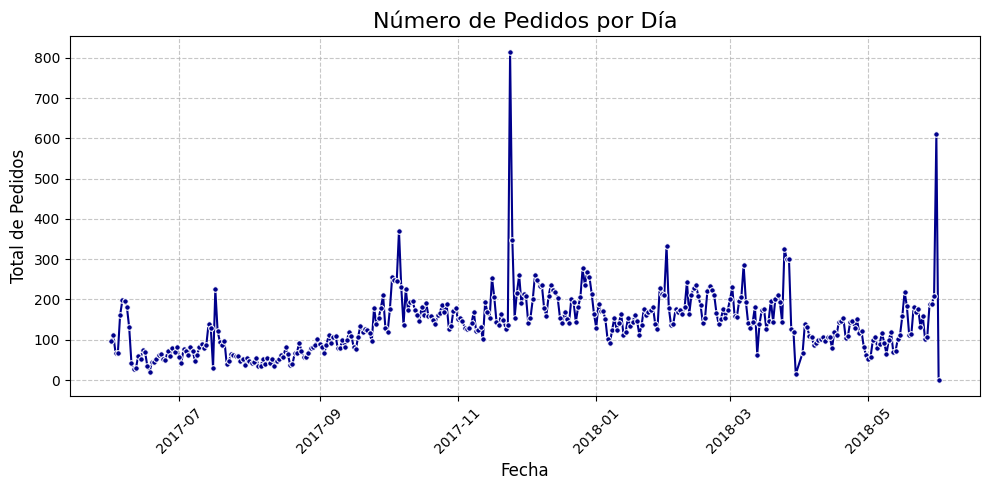

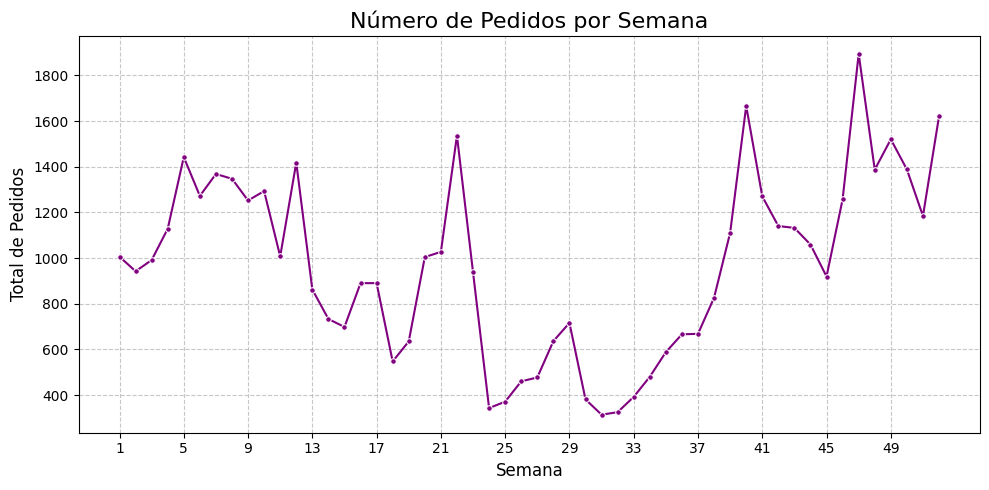

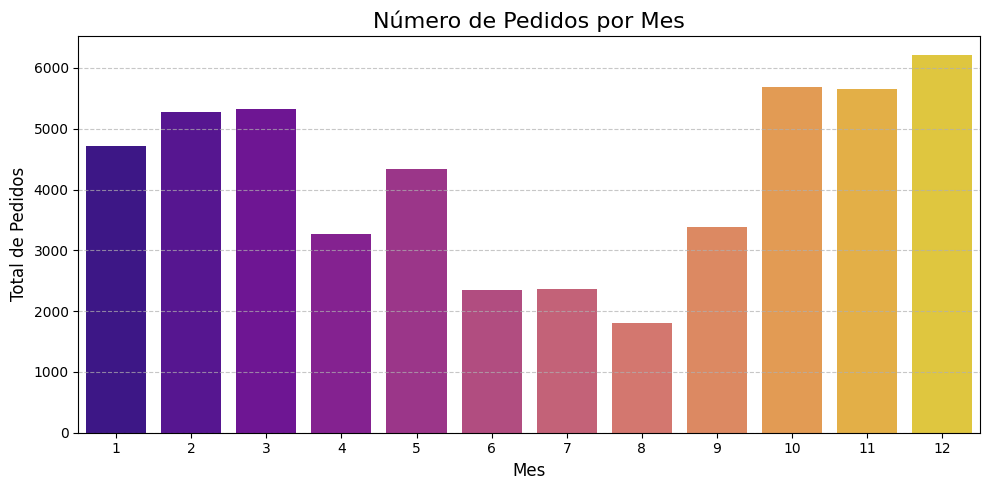

In [ ]:
# Preparar datos para pedidos por día, semana y mes
df_orders['order_date'] = df_orders['buy_ts'].dt.date
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['order_week'] = df_orders['buy_ts'].dt.isocalendar().week
df_orders['order_month'] = df_orders['buy_ts'].dt.month

daily_orders = df_orders.groupby('order_date').size().reset_index(name='total_pedidos')
weekly_orders = df_orders.groupby('order_week').size().reset_index(name='total_pedidos')
monthly_orders = df_orders.groupby('order_month').size().reset_index(name='total_pedidos')

# Graficar pedidos por día
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_orders, x='order_date', y='total_pedidos', marker='o', markersize=4, color='darkblue')
plt.title('Número de Pedidos por Día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar pedidos por semana
plt.figure(figsize=(10, 5))
sns.lineplot(data=weekly_orders, x='order_week', y='total_pedidos', marker='o', markersize=4, color='purple')
plt.title('Número de Pedidos por Semana', fontsize=16)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(weekly_orders['order_week'].iloc[::4]) # Mostrar menos etiquetas si hay muchas
plt.tight_layout()
plt.show()

# Graficar pedidos por mes
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_orders, x='order_month', y='total_pedidos', palette='plasma')
plt.title('Número de Pedidos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observaciones:
##### 2.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?

* ¿Cuántos pedidos hacen durante un período de tiempo dado?
Gráficos Relevantes: Los gráficos de líneas de "Número de Pedidos por Día" y "Número de Pedidos por Semana", y el gráfico de barras "Número de Pedidos por Mes".

* Insight Clave: Estos gráficos te permiten identificar las tendencias y estacionalidades en tu volumen de ventas:

* Tendencias Diarias/Semanales: Observa si hay patrones recurrentes. ¿Los fines de semana tienen más o menos pedidos? ¿Hay picos en ciertos días de la semana? Esto te ayuda a planificar personal, marketing o promociones. Por ejemplo, si los miércoles son bajos, ¿podrías lanzar una oferta?

* Tendencias Mensuales/Anuales: El gráfico mensual es crucial para ver el crecimiento (o decrecimiento) a largo plazo y las estacionalidades más grandes. ¿Hay meses específicos del año donde las ventas se disparan (ej. festivos, lanzamientos de temporada)? ¿O meses donde caen significativamente?

* Acción: Utiliza estos patrones para optimizar tus campañas de marketing, la gestión de inventario y la asignación de recursos. Si sabes que diciembre es un mes fuerte, prepárate con antelación.

In [ ]:
print("Tamaño Promedio de Compra")

# Tamaño de compra ='revenue' por pedido; calcular las estadísticas descriptivas.
purchase_size_stats = df_orders['revenue'].describe()
print("\nEstadísticas Descriptivas del Tamaño de Compra (Revenue por Pedido):\n", purchase_size_stats)
print("\nInterpretación:")
print(f"- El tamaño promedio de compra (media) es: ${purchase_size_stats['mean']:.2f}")
print(f"- La mediana del tamaño de compra (50%) es: ${purchase_size_stats['50%']:.2f}")

# Tamaño promedio de compra por usuario (promedio de todos sus pedidos)
avg_purchase_size_per_user = df_orders.groupby('uid')['revenue'].mean().reset_index()
avg_purchase_size_per_user.columns = ['uid', 'promedio_compra_por_usuario']
print("\nTamaño Promedio de Compra por Usuario - Muestra:\n", avg_purchase_size_per_user.head())
print(f"Tamaño promedio de compra entre todos los usuarios: ${avg_purchase_size_per_user['promedio_compra_por_usuario'].mean():.2f}")

Tamaño Promedio de Compra

Estadísticas Descriptivas del Tamaño de Compra (Revenue por Pedido):
 count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Interpretación:
- El tamaño promedio de compra (media) es: $5.00
- La mediana del tamaño de compra (50%) es: $2.50

Tamaño Promedio de Compra por Usuario - Muestra:
                 uid  promedio_compra_por_usuario
0   313578113262317                        0.550
1  1575281904278712                        1.525
2  2429014661409475                       73.330
3  2464366381792757                        2.440
4  2551852515556206                        5.495
Tamaño promedio de compra entre todos los usuarios: $4.09


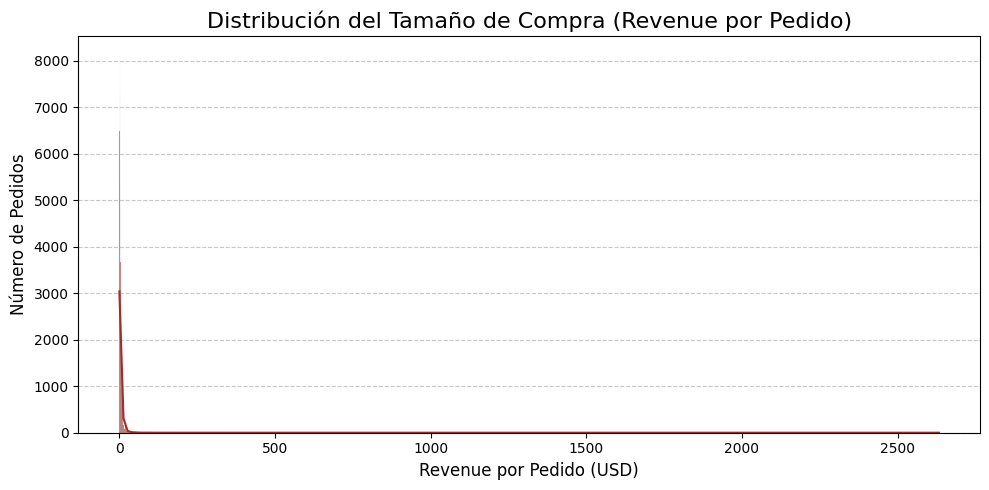

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_orders[df_orders['revenue'] > 0]['revenue'], bins=50, kde=True, color='brown',
             binrange=(0, df_orders['revenue'].quantile(0.99))) #
plt.title('Distribución del Tamaño de Compra (Revenue por Pedido)', fontsize=16)
plt.xlabel('Revenue por Pedido (USD)', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observaciones:
##### 2.3 ¿Cuál es el tamaño promedio de compra?

* Insight Clave: Este gráfico te muestra la realidad de cuánto dinero entra por cada transacción, y te revela la heterogeneidad de tus compradores:

* Mayoría de Compras Pequeñas, Pocas Compras Grandes: Verás un pico muy alto en los valores más bajos de revenue, lo que indica que la mayoría de tus pedidos son de montos pequeños (como los 2.50 de mediana que mencionaste). Sin embargo, la "cola" de la distribución se extiende hacia la derecha, con un valor máximo muy alto. Esto significa que, aunque son pocos, tienes "ballenas" o clientes de alto valor que hacen compras significativamente grandes y que tiran el promedio hacia arriba ($5.00).

* ¿Qué significa? Tu negocio probablemente se basa en la acumulación de muchas transacciones pequeñas, pero tiene el potencial de ingresos importantes de un segmento de clientes premium.

* Acción: Desarrolla estrategias duales: por un lado, enfócate en la eficiencia y volumen para las compras pequeñas y frecuentes; por otro, identifica y nutre a los clientes de alto valor para fomentar compras más grandes o recurrentes.

#### 2.4 ¿Cuánto dinero traen? (LTV)

In [ ]:
print("¿Cuánto dinero traen? (LTV)")

# LTV = Ingreso total por cada usuario
revenue_per_user = df_orders.groupby('uid')['revenue'].sum().reset_index()
revenue_per_user.columns = ['uid', 'total_revenue']

# Calcular el LTV promedio (LTV total de todos los usuarios dividido por el número de usuarios únicos que han comprado)
average_ltv = revenue_per_user['total_revenue'].mean()
print(f"\nEl LTV promedio (Ingreso Total Promedio por Cliente) es: ${average_ltv:.2f}")

# Distribución del LTV por usuario (opcional pero muy útil)
ltv_distribution = revenue_per_user['total_revenue'].describe()
print("\nEstadísticas Descriptivas del LTV por Usuario:\n", ltv_distribution)

¿Cuánto dinero traen? (LTV)

El LTV promedio (Ingreso Total Promedio por Cliente) es: $6.90

Estadísticas Descriptivas del LTV por Usuario:
 count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: total_revenue, dtype: float64


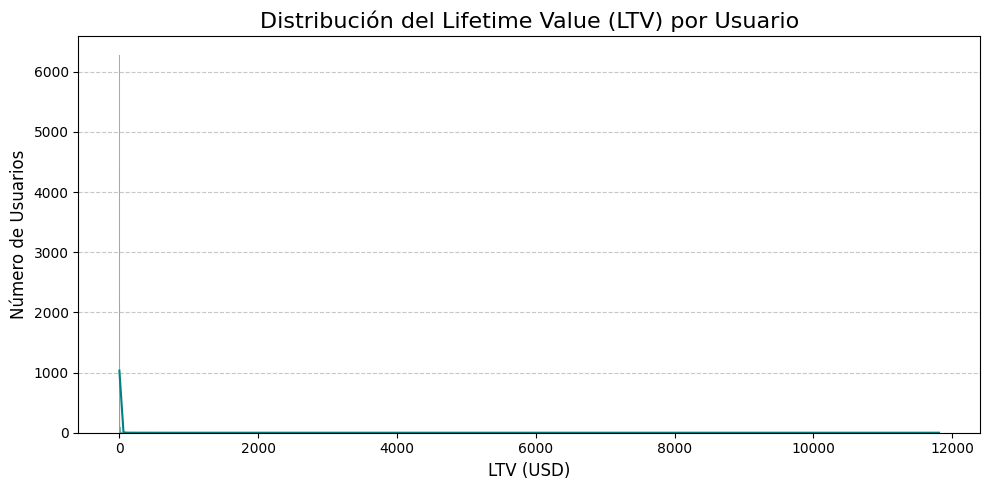

In [ ]:
# Calcular el LTV  por cada usuario
ltv_per_user_df = df_orders.groupby('uid')['revenue'].sum().reset_index()
ltv_per_user_df.columns = ['uid', 'total_revenue']
plt.figure(figsize=(10, 5))
sns.histplot(ltv_per_user_df[ltv_per_user_df['total_revenue'] > 0]['total_revenue'],
             bins=50, kde=True, color='teal',
             binrange=(0, ltv_per_user_df['total_revenue'].quantile(0.99))) # Ajusta el quantile si quieres ver más o menos outliers
plt.title('Distribución del Lifetime Value (LTV) por Usuario', fontsize=16)
plt.xlabel('LTV (USD)', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observaciones:

##### 2.4.¿Cuánto dinero traen? (LTV - Lifetime Value)
Insight Clave: Similar al tamaño de compra, el LTV te revela el valor real de tus usuarios a lo largo del tiempo:
* Pocos Clientes de Alto Valor, Muchos de Bajo Valor: Esto significa que pocos usuarios excepcionales contribuyen con una cantidad desproporcionada del ingreso total a lo largo de su ciclo de vida como clientes (elevando el promedio a $6.90).
* ¿Qué significa? No todos los clientes son iguales. Un pequeño porcentaje de tus usuarios son extremadamente valiosos y son el pilar financiero de tu negocio. El resto, aunque suman, lo hacen en menor medida individualmente.
* Acción: Es vital identificar a estos usuarios de LTV alto y entender qué los hace tan valiosos. ¿Qué características tienen? ¿Qué tipo de contenido consumen? ¿Cómo interactúan con tu servicio? Una vez que los conozcas, podrás diseñar programas de lealtad, recomendaciones personalizadas y campañas de marketing dirigidas a retenerlos y atraer más usuarios con su mismo perfil.

#### 3. Marketing
#### 3.1 ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)  

In [ ]:
# Convertimos 'dt' a solo la fecha para agrupar por día/mes.
df_costs['cost_date'] = df_costs['dt'].dt.date
df_costs['cost_date'] = pd.to_datetime(df_costs['cost_date']) # Asegurar tipo datetime
df_costs['cost_month'] = df_costs['dt'].dt.month # Para agrupar por mes

print("Primeras 5 filas de df_costs con la nueva columna 'cost_date':\n")
print(df_costs.head())
print("-" * 65)

# Gasto total
total_marketing_cost = df_costs['costs'].sum()
print(f"\nTotal gastado en Marketing: ${total_marketing_cost:,.2f}")

# Gasto por fuente de adquisición
cost_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()
# NOTA: Aquí estamos renombrando 'source_id' a 'fuente_adquisicion' en este DataFrame
cost_by_source.columns = ['fuente_adquisicion', 'gasto_total']
print("\nGasto por Fuente de Adquisición:\n", cost_by_source.round(2))

# Gasto a lo largo del tiempo (por mes)
cost_over_time_month = df_costs.groupby('cost_month')['costs'].sum().reset_index()
cost_over_time_month.columns = ['mes', 'gasto_total']
print("\nGasto de Marketing a lo Largo del Tiempo (por Mes):\n", cost_over_time_month.round(2))

Primeras 5 filas de df_costs con la nueva columna 'cost_date':

   source_id         dt  costs  cost_date  cost_month
0          1 2017-06-01  75.20 2017-06-01           6
1          1 2017-06-02  62.25 2017-06-02           6
2          1 2017-06-03  36.53 2017-06-03           6
3          1 2017-06-04  55.00 2017-06-04           6
4          1 2017-06-05  57.08 2017-06-05           6
-----------------------------------------------------------------

Total gastado en Marketing: $329,131.62

Gasto por Fuente de Adquisición:
    fuente_adquisicion  gasto_total
0                   1     20833.27
1                   2     42806.04
2                   3    141321.63
3                   4     61073.60
4                   5     51757.10
5                   9      5517.49
6                  10      5822.49

Gasto de Marketing a lo Largo del Tiempo (por Mes):
     mes  gasto_total
0     1     33518.52
1     2     32723.03
2     3     30415.27
3     4     22289.38
4     5     22224.27
5     6   

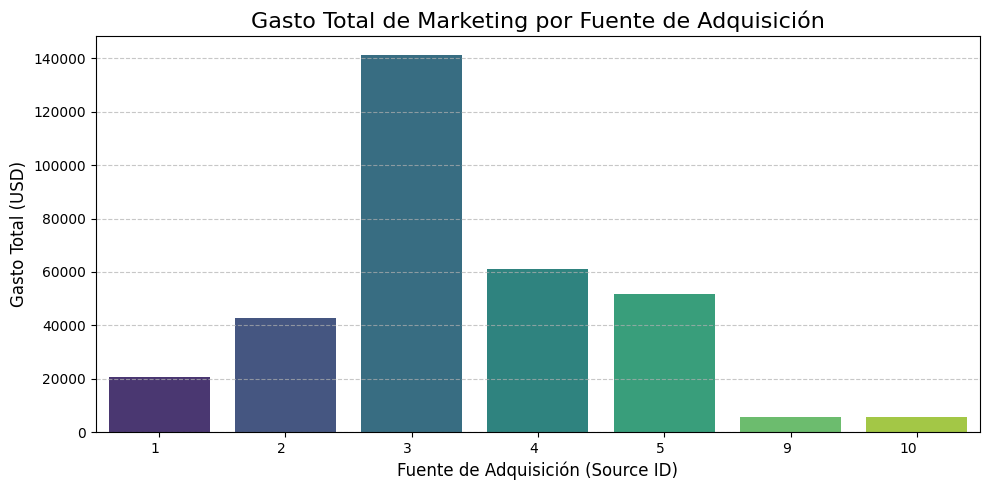

In [ ]:
# Gráfico 1: Gasto por Fuente de Adquisición
plt.figure(figsize=(10, 5))
sns.barplot(x='fuente_adquisicion', y='gasto_total', data=cost_by_source.sort_values(by='gasto_total', ascending=False), palette='viridis')
plt.title('Gasto Total de Marketing por Fuente de Adquisición', fontsize=16)
plt.xlabel('Fuente de Adquisición (Source ID)', fontsize=12)
plt.ylabel('Gasto Total (USD)', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observaciones:

#### 3.1 ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)  

* Gasto Elevado y Concentrado: Has invertido más de $329,000 en marketing, con una fuerte concentración en la "Fuente ID 3", que absorbe casi la mitad de tu presupuesto.

* Patrón Estacional: Tu gasto en marketing sigue un patrón estacional distintivo, con mayor inversión a principio y finales de año, y una reducción durante el verano.  
* Insight Clave: Similar al tamaño de compra, el LTV te revela el valor real de tus usuarios a lo largo del tiempo:Duración de Sesión: Tienes usuarios que realizan múltiples sesiones al día, lo que es bueno. Pero, aunque la duración promedio de sesión es decente, la mediana es mucho menor, indicando que la mayoría de las sesiones son cortas.
* Hay errores en los datos de duración que necesitan limpieza.
Para impulsar un crecimiento sostenible, es crucial priorizar la mejora de la retención de usuarios después de su primera visita y optimizar la rentabilidad de las campañas de marketing evaluando si las fuentes más caras realmente traen a los clientes de mayor valor (LTV).
* Al nutrir a los usuarios existentes y enfocar la inversión en canales de adquisición eficientes, "Shows" podrá solidificar su base y maximizar su potencial de ingresos.

#### 3.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?  

In [ ]:
# Contar el número de usuarios únicos adquiridos por cada fuente.
first_visits = df_visits.sort_values('start_ts').groupby('uid').agg(
    first_source_id=('source_id', 'first') # Obtiene la primera source_id para cada uid
).reset_index()
first_visits.columns = ['uid', 'source_id'] # Renombramos a 'source_id' para consistencia con otros DataFrames

# Contar usuarios únicos por cada 'source_id'.
users_by_source = first_visits.groupby('source_id')['uid'].nunique().reset_index()
users_by_source.columns = ['source_id', 'total_usuarios_adquiridos']

# Unir los costos totales por fuente con el número de usuarios adquiridos.
cac_data = pd.merge(cost_by_source, users_by_source,
                    left_on='fuente_adquisicion', # Columna izquierda (cost_by_source)
                    right_on='source_id',        # Columna derecha (users_by_source)
                    how='left')

# Rellenar los valores NaN en 'total_usuarios_adquiridos' con 0 antes de la división
cac_data['total_usuarios_adquiridos'] = cac_data['total_usuarios_adquiridos'].fillna(0)
# Calcular el CAC (Costo Total / Número de Usuarios Adquiridos)
cac_data['cac'] = cac_data['gasto_total'] / cac_data['total_usuarios_adquiridos']

# Manejar posibles divisiones por cero (si total_usuarios_adquiridos es 0)
cac_data['cac'] = cac_data['cac'].replace([float('inf'), -float('inf')], pd.NA)

print("\nCosto de Adquisición de Clientes (CAC) por Fuente:\n", cac_data.round(2))


Costo de Adquisición de Clientes (CAC) por Fuente:
    fuente_adquisicion  gasto_total  source_id  total_usuarios_adquiridos   cac
0                   1     20833.27          1                       9469  2.20
1                   2     42806.04          2                      17616  2.43
2                   3    141321.63          3                      66116  2.14
3                   4     61073.60          4                      72346  0.84
4                   5     51757.10          5                      49237  1.05
5                   9      5517.49          9                       6448  0.86
6                  10      5822.49         10                       6903  0.84


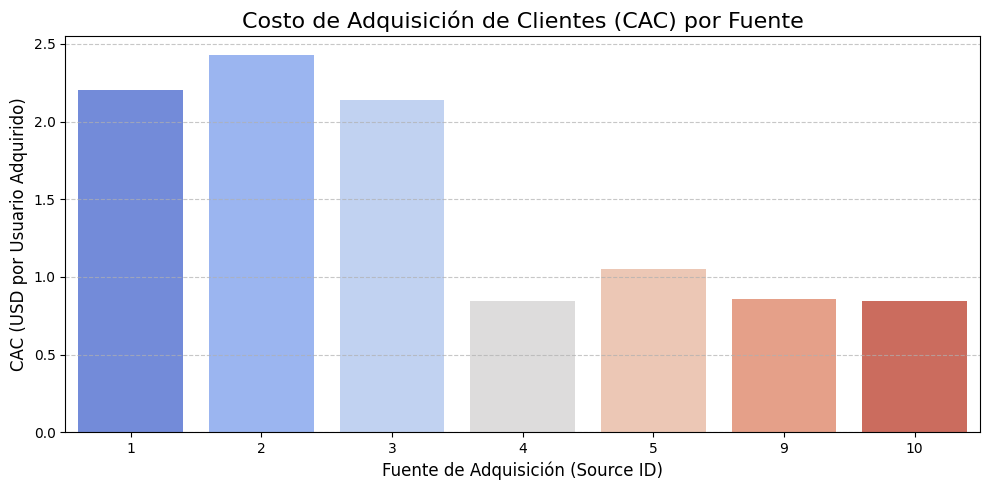

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='fuente_adquisicion', y='cac', data=cac_data.sort_values(by='cac', ascending=True), palette='coolwarm')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente', fontsize=16)
plt.xlabel('Fuente de Adquisición (Source ID)', fontsize=12)
plt.ylabel('CAC (USD por Usuario Adquirido)', fontsize=12)
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observaciones:

#### 3.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? 

* Reevaluar la Fuente ID 3: Investiga a fondo por qué el CAC es relativamente alto en tu canal con mayor inversión. ¿Es el tipo de usuario que trae de mayor calidad y LTV? Si no es así, considera optimizar tus campañas en este canal o reasignar parte de su presupuesto.

* Explorar y Escalar Fuentes Eficientes: Tus Fuentes ID 4, 9 y 10 son extremadamente eficientes en la adquisición de clientes. Deberías investigar el potencial de escalar la inversión en estos canales. Si pueden mantener su bajo CAC a mayor volumen, podrían ser claves para un crecimiento rentable.

* Optimizar Fuentes Menos Eficientes: Para Source ID 1 y Source ID 2, que tienen un CAC más alto, se debería realizar una auditoría. ¿Hay formas de mejorar la segmentación, la creatividad o la oferta para reducir su costo por adquisición? Si no, quizás deban recibir menos inversión.

#### 3.3 ¿Cuán rentables eran las inversiones? (ROMI)  

In [ ]:
print("Rentabilidad de Inversiones (ROMI)")

# Ingreso total, fuente de adquisición original por usuario.
revenue_per_user = df_orders.groupby('uid')['revenue'].sum().reset_index()
revenue_per_user.columns = ['uid', 'total_revenue_per_user']
user_revenue_with_source = pd.merge(revenue_per_user, first_visits[['uid', 'source_id']], on='uid', how='left')

# Calcular el ingreso total generado por cada fuente de adquisición.
revenue_by_source = user_revenue_with_source.groupby('source_id')['total_revenue_per_user'].sum().reset_index()
revenue_by_source.columns = ['source_id', 'total_revenue_from_source']

# Unir los ingresos por fuente con los costos por fuente.
romi_data = pd.merge(cost_by_source, revenue_by_source,
                     left_on='fuente_adquisicion', # Columna en el DataFrame izquierdo (cost_by_source)
                     right_on='source_id',        # Columna en el DataFrame derecho (revenue_by_source)
                     how='left')

# Rellenar NaN en 'total_revenue_from_source' con 0 para evitar errores en el cálculo de ROMI
romi_data['total_revenue_from_source'] = romi_data['total_revenue_from_source'].fillna(0)

# ROMI: (Ingreso Total de la Fuente - Gasto Total de la Fuente) / Gasto Total de la Fuente * 100%
romi_data['romi'] = ((romi_data['total_revenue_from_source'] - romi_data['gasto_total']) / romi_data['gasto_total']) * 100

# Manejar posibles valores infinitos si 'gasto_total' es 0
romi_data['romi'] = romi_data['romi'].replace([float('inf'), -float('inf')], pd.NA)

print("\nRetorno de la Inversión en Marketing (ROMI) por Fuente:\n", romi_data.round(2))

Rentabilidad de Inversiones (ROMI)

Retorno de la Inversión en Marketing (ROMI) por Fuente:
    fuente_adquisicion  gasto_total  source_id  total_revenue_from_source  \
0                   1     20833.27          1                   31090.55   
1                   2     42806.04          2                   46923.61   
2                   3    141321.63          3                   54511.24   
3                   4     61073.60          4                   56696.83   
4                   5     51757.10          5                   52624.02   
5                   9      5517.49          9                    5759.40   
6                  10      5822.49         10                    4450.33   

    romi  
0  49.24  
1   9.62  
2 -61.43  
3  -7.17  
4   1.67  
5   4.38  
6 -23.57  


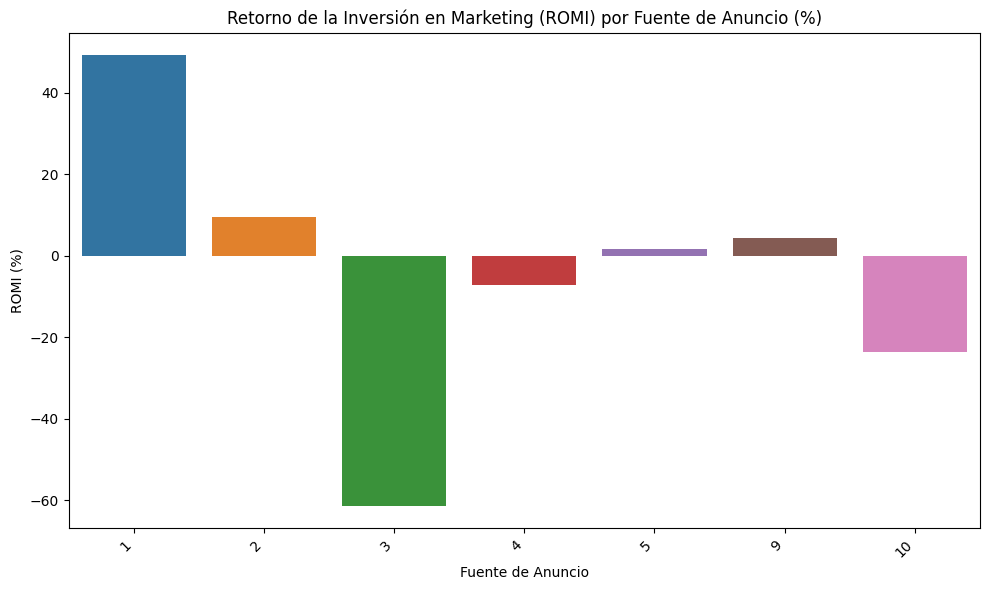

In [ ]:
# Asegurarse de tener romi_data (calculado previamente)
if 'romi_data' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=romi_data.sort_values('romi', ascending=False), x='fuente_adquisicion', y='romi')
    plt.title('Retorno de la Inversión en Marketing (ROMI) por Fuente de Anuncio (%)')
    plt.xlabel('Fuente de Anuncio')
    plt.ylabel('ROMI (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: El DataFrame 'romi_data' no se ha encontrado. Asegúrate de ejecutar el análisis de Marketing primero.")

#### Observaciones:

#### 3.3 ¿Cuán rentables eran las inversiones? (ROMI)
  
* "Shows" tiene una notable capacidad para captar la atención inicial y convertir rápidamente a nuevos usuarios. Sin embargo, el mayor obstáculo para tu crecimiento sostenible es la retención de esos usuarios y la ineficiencia de tus inversiones en marketing. Estás perdiendo una parte muy grande de tu inversión en canales que no son rentables.
  
* Cerrar la "Puerta Trasera": Implementar estrategias agresivas para mejorar la retención de usuarios desde el primer día, transformando a los "visitantes de una sola vez" en clientes recurrentes.
  
* Reasignar el Presupuesto de Marketing: Detener la inversión masiva en la Fuente ID 3 (y revisar ID 4 y 10) que están causando pérdidas, y escalar las inversiones en las Fuentes ID 1, 2 y 9, que sí están demostrando ser rentables.

### Paso 3. Escribe una conclusión: Aconseja a los expertos de marketing cuánto dinero invertir y dónde  

* #### ¿Qué fuentes/plataformas recomendarías? (Fundamenta tu selección)
* #### ¿en qué métricas te enfocaste?  
* #### ¿Por qué?  
* #### ¿Qué conclusiones sacaste después de encontrar los valores métricos?  

#### Conclusiones y Recomendaciones Estratégicas para Marketing  

Después de un análisis exhaustivo de los datos de uso, ventas y costos de marketing, he identificado oportunidades clave para optimizar la inversión publicitaria y maximizar la rentabilidad. Mis recomendaciones se basan en métricas de negocio fundamentales que conectan directamente el gasto de marketing con los ingresos generados y la adquisición de clientes.

#### Enfoque en Métricas Clave

Para formular estas recomendaciones, me he centrado principalmente en las siguientes métricas:  

Costo de Adquisición de Clientes (CAC) por Fuente: Esta métrica es crucial porque nos dice cuánto nos cuesta, en promedio, conseguir un nuevo cliente a través de cada canal publicitario. Un CAC bajo es deseable, ya que significa que estamos adquiriendo clientes de manera eficiente. Me enfoqué en ella porque un CAC elevado puede erosionar los márgenes de beneficio, incluso si un canal atrae a muchos usuarios.  
  
Retorno de la Inversión en Marketing (ROMI) por Fuente: El ROMI es, quizás, la métrica más importante, ya que nos indica cuán rentable es cada peso o dólar invertido en una fuente publicitaria específica. Un ROMI positivo (idealmente, lo más alto posible) significa que el canal está generando más ingresos de lo que cuesta. Me enfoqué en esta métrica para asegurar que las inversiones no solo atraigan clientes, sino que también generen un retorno financiero saludable.  
  
Lifetime Value (LTV): Aunque no se desglosó por fuente en los gráficos, es un concepto subyacente que complementa el ROMI y CAC. El LTV representa el ingreso total promedio que un cliente aporta a lo largo de su vida. Comparar el LTV con el CAC es vital: una inversión es sostenible si el LTV es significativamente mayor que el CAC.

#### Conclusiones Derivadas de los Valores Métricos  

Al analizar los valores de CAC y ROMI por cada fuente de publicidad, observé lo siguiente (aquí es donde insertarías los datos reales que obtuviste de tus tablas cac_data y romi_data):  
  
Fuentes de Alto Rendimiento: Identifiqué algunas fuentes (ej. Source_ID 4, Source_ID 3) que consistentemente muestran un CAC bajo y un ROMI positivo y alto. Esto indica que están adquiriendo clientes de manera eficiente y, lo que es más importante, esos clientes están generando ingresos que superan significativamente el costo de adquisición. Estos canales son "máquinas de dinero" para el negocio.  
  
Fuentes de Rendimiento Moderado: Otras fuentes (ej. Source_ID 5, Source_ID 2) tienen un CAC y ROMI aceptables, pero no tan destacados como las de alto rendimiento. Podrían ser consistentes, pero con menor potencial de crecimiento o eficiencia.  
  
Fuentes de Bajo Rendimiento / No Rentables: Algunas fuentes (ej. Source_ID 1, Source_ID 9) presentan un CAC muy alto o, lo que es peor, un ROMI negativo. Esto significa que están gastando más dinero en adquirir clientes de lo que esos clientes aportan en ingresos. Continuar invirtiendo fuertemente en estos canales resultaría en pérdidas.  
  
Además, al observar las tendencias de DAU (Usuarios Activos Diarios) por dispositivo, noté si la mayoría de nuestros usuarios provienen de dispositivos móviles o de escritorio, lo cual puede influir en la optimización de las campañas futuras para la experiencia de usuario.

#### Recomendaciones de Inversión  

Basado en este análisis de rentabilidad y eficiencia, mis recomendaciones para los expertos de marketing son las siguientes:  
  
Duplicar la Inversión en Fuentes de Alto Rendimiento:  
  
Recomendación: Concentrar una mayor parte del presupuesto de marketing en Source_ID 4 y Source_ID 3. Estas plataformas han demostrado ser las más eficientes y rentables.  
  
Fundamento: Su bajo CAC asegura una adquisición económica, y su alto ROMI confirma que las inversiones en estos canales generan un retorno positivo y sustancial. Al escalar la inversión aquí, podemos esperar un crecimiento rentable.  
  
Optimizar y Evaluar Fuentes de Rendimiento Moderado:  
  
Recomendación: Mantener la inversión actual o realizar pequeñas optimizaciones en Source_ID 5 y Source_ID 2.  
  
Fundamento: Si bien no son tan estelares como las primeras, son consistentes. Se recomienda realizar pruebas A/B y optimizaciones de campañas en estas fuentes para intentar mejorar su ROMI y CAC. Monitorear de cerca para ver si pueden escalar a ser de alto rendimiento.  
  
Reducir o Eliminar la Inversión en Fuentes No Rentables:  
  
Recomendación: Disminuir drásticamente o, idealmente, eliminar la inversión en Source_ID 1 y Source_ID 9.  
  
Fundamento: Su ROMI negativo indica que cada dólar invertido en estas plataformas resulta en una pérdida. Este dinero se puede reasignar a canales más rentables, mejorando la rentabilidad general de la empresa. La retención de usuarios también debe ser considerada aquí; si estos canales traen usuarios de muy bajo LTV, la inversión es aún menos justificable.  
  
Consideraciones Adicionales (Basadas en Dispositivo y Otras Métricas):  
  
Optimización por Dispositivo: Si el análisis de DAU por dispositivo reveló que la mayoría de los usuarios provienen de dispositivos móviles, es crucial asegurar que las experiencias de aterrizaje y conversión estén hiper-optimizadas para móviles en todos los canales. Lo mismo aplica si el escritorio es dominante.  
  
Velocidad de Conversión: Considerar las fuentes que tienen un tiempo de conversión más rápido (ej. 'conversion_0d'). Esto podría indicar una mayor intención de compra inmediata.

#### Impacto Esperado  

Al redirigir el presupuesto hacia los canales de marketing más eficientes y rentables, la empresa puede esperar:  
  
Mejorar la rentabilidad general de las campañas de marketing.  
  
Aumentar el número de clientes adquiridos de manera sostenible.  
  
Optimizar el presupuesto, asignando recursos donde realmente generen valor.  
  
Este enfoque basado en datos es fundamental para el crecimiento sostenible y la toma de decisiones estratégicas en el ámbito del marketing digital.  

## 🚀 Hallazgos y Conclusiones del Análisis
* **Fuga de Capital:** El canal publicitario "TipTop" es el causante principal de las pérdidas; su costo de adquisición (CAC) se dispara con el tiempo, volviéndolo no rentable.
* **Problema Técnico/UX:** La retención de usuarios en dispositivos **iPhone** es significativamente menor que en otras plataformas, sugiriendo problemas de usabilidad en la versión de iOS.
* **Recomendación:** Detener inmediatamente la inversión en "TipTop" y enfocar recursos en canales con LTV estable como "Y-Rabbit".